<a href="https://colab.research.google.com/github/luqyz/Corpus/blob/main/Corpus_and_Text_Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Natural Language Toolkit (NLTK) is a popular open-source software library designed to help developers work with human language data. NLTK provides a range of tools and resources to assist with tasks such as text processing, tokenization, part-of-speech tagging, named entity recognition, sentiment analysis, machine translation, and more.


In [ ]:
# import nltk library
import nltk


## NLTK Corpora : Twitter Corpus

In this activity, you will be using Twitter corpus.  


* **twitter corpus**: a collection of approximately 20,000 tweets that were collected during a six-month period in 2009.

## Twitter Corpus
The Twitter Corpus is a collection of tweets (short messages posted on Twitter) that has been compiled and made available for research and analysis in the Natural Language Toolkit (NLTK) library. The corpus consists of approximately 20,000 tweets that were collected during a six-month period in 2009.

In [ ]:
#collapse-hide
# Import libraries and load the data
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import twitter_samples

nltk.download('twitter_samples') # Download the dataset

# We are going to use the Negative and Positive Tweets file which each contains 5000 tweets.
for name in twitter_samples.fileids():
    print(f' - {name}')

 - negative_tweets.json
 - positive_tweets.json
 - tweets.20150430-223406.json


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [ ]:
#collapse-hide

# Load the negative tweets file and assign label as 0 for negative
negative_tweets = twitter_samples.strings("negative_tweets.json")
df_neg = pd.DataFrame(negative_tweets, columns=['text'])
df_neg['label'] = 0

# Load the positive tweets file and assign label as 1 for positive
positive_tweets = twitter_samples.strings("positive_tweets.json")
df_pos = pd.DataFrame(positive_tweets, columns=['text'])
df_pos['label'] = 1

df = pd.concat([df_pos, df_neg]) # Concatenate both the files
df = df.sample(frac=1).reset_index(drop=True) # Shuffle the data to mix negative and positive tweets

In [ ]:
print(f'Shape of the whole data is: {df.shape[0]} rows and {df.shape[1]} columns')

Shape of the whole data is: 10000 rows and 2 columns


In [ ]:
# Look at the head of the dataframe
df.head(10)

text  label
0                                Want pluckerssss :(      0
1           @jungsilhoon ......... not really :(((((      0
2             Have a blessed friday :)\n#جمعة_مباركة      1
3  💓🚮👯- the definition of perfection would have a...      1
4  @aspenrage @jasmineneupane @jyotsnanepal i app...      1
5  GUYS add me on SNAPCHAT - AmargoLonnard #snapc...      0
6                                       Done! Yey :)      1
7  @DesignThinkMake We're so glad you discovered ...      1
8  "@yettygeers: in good and in bad days, God is ...      1
9                         can't go back to sleep :((      0

> Note: Always make it a practice to first skim the dataset before performing any text pre-processing steps. It is important because text data can be very noisy eg. dates are written in different formats, present of accented characters, etc. These are stuff we can easily miss if we don't go through the dataset properly.

### WordCloud

A **word cloud** is a visual representation of text data in which the **most frequently** occurring words are displayed in a **larger font** size, while **less frequently** occurring words are displayed in **smaller font** sizes.

Word clouds are often used **to provide a quick and easy overview** of the most important words or themes in a piece of text, such as a news article, a blog post, or a social media feed.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
all_text = df.text

!!! important part !!!
combine all text inside text_positive as "string"

In [ ]:
string = pd.Series(all_text).str.cat(sep=' ')

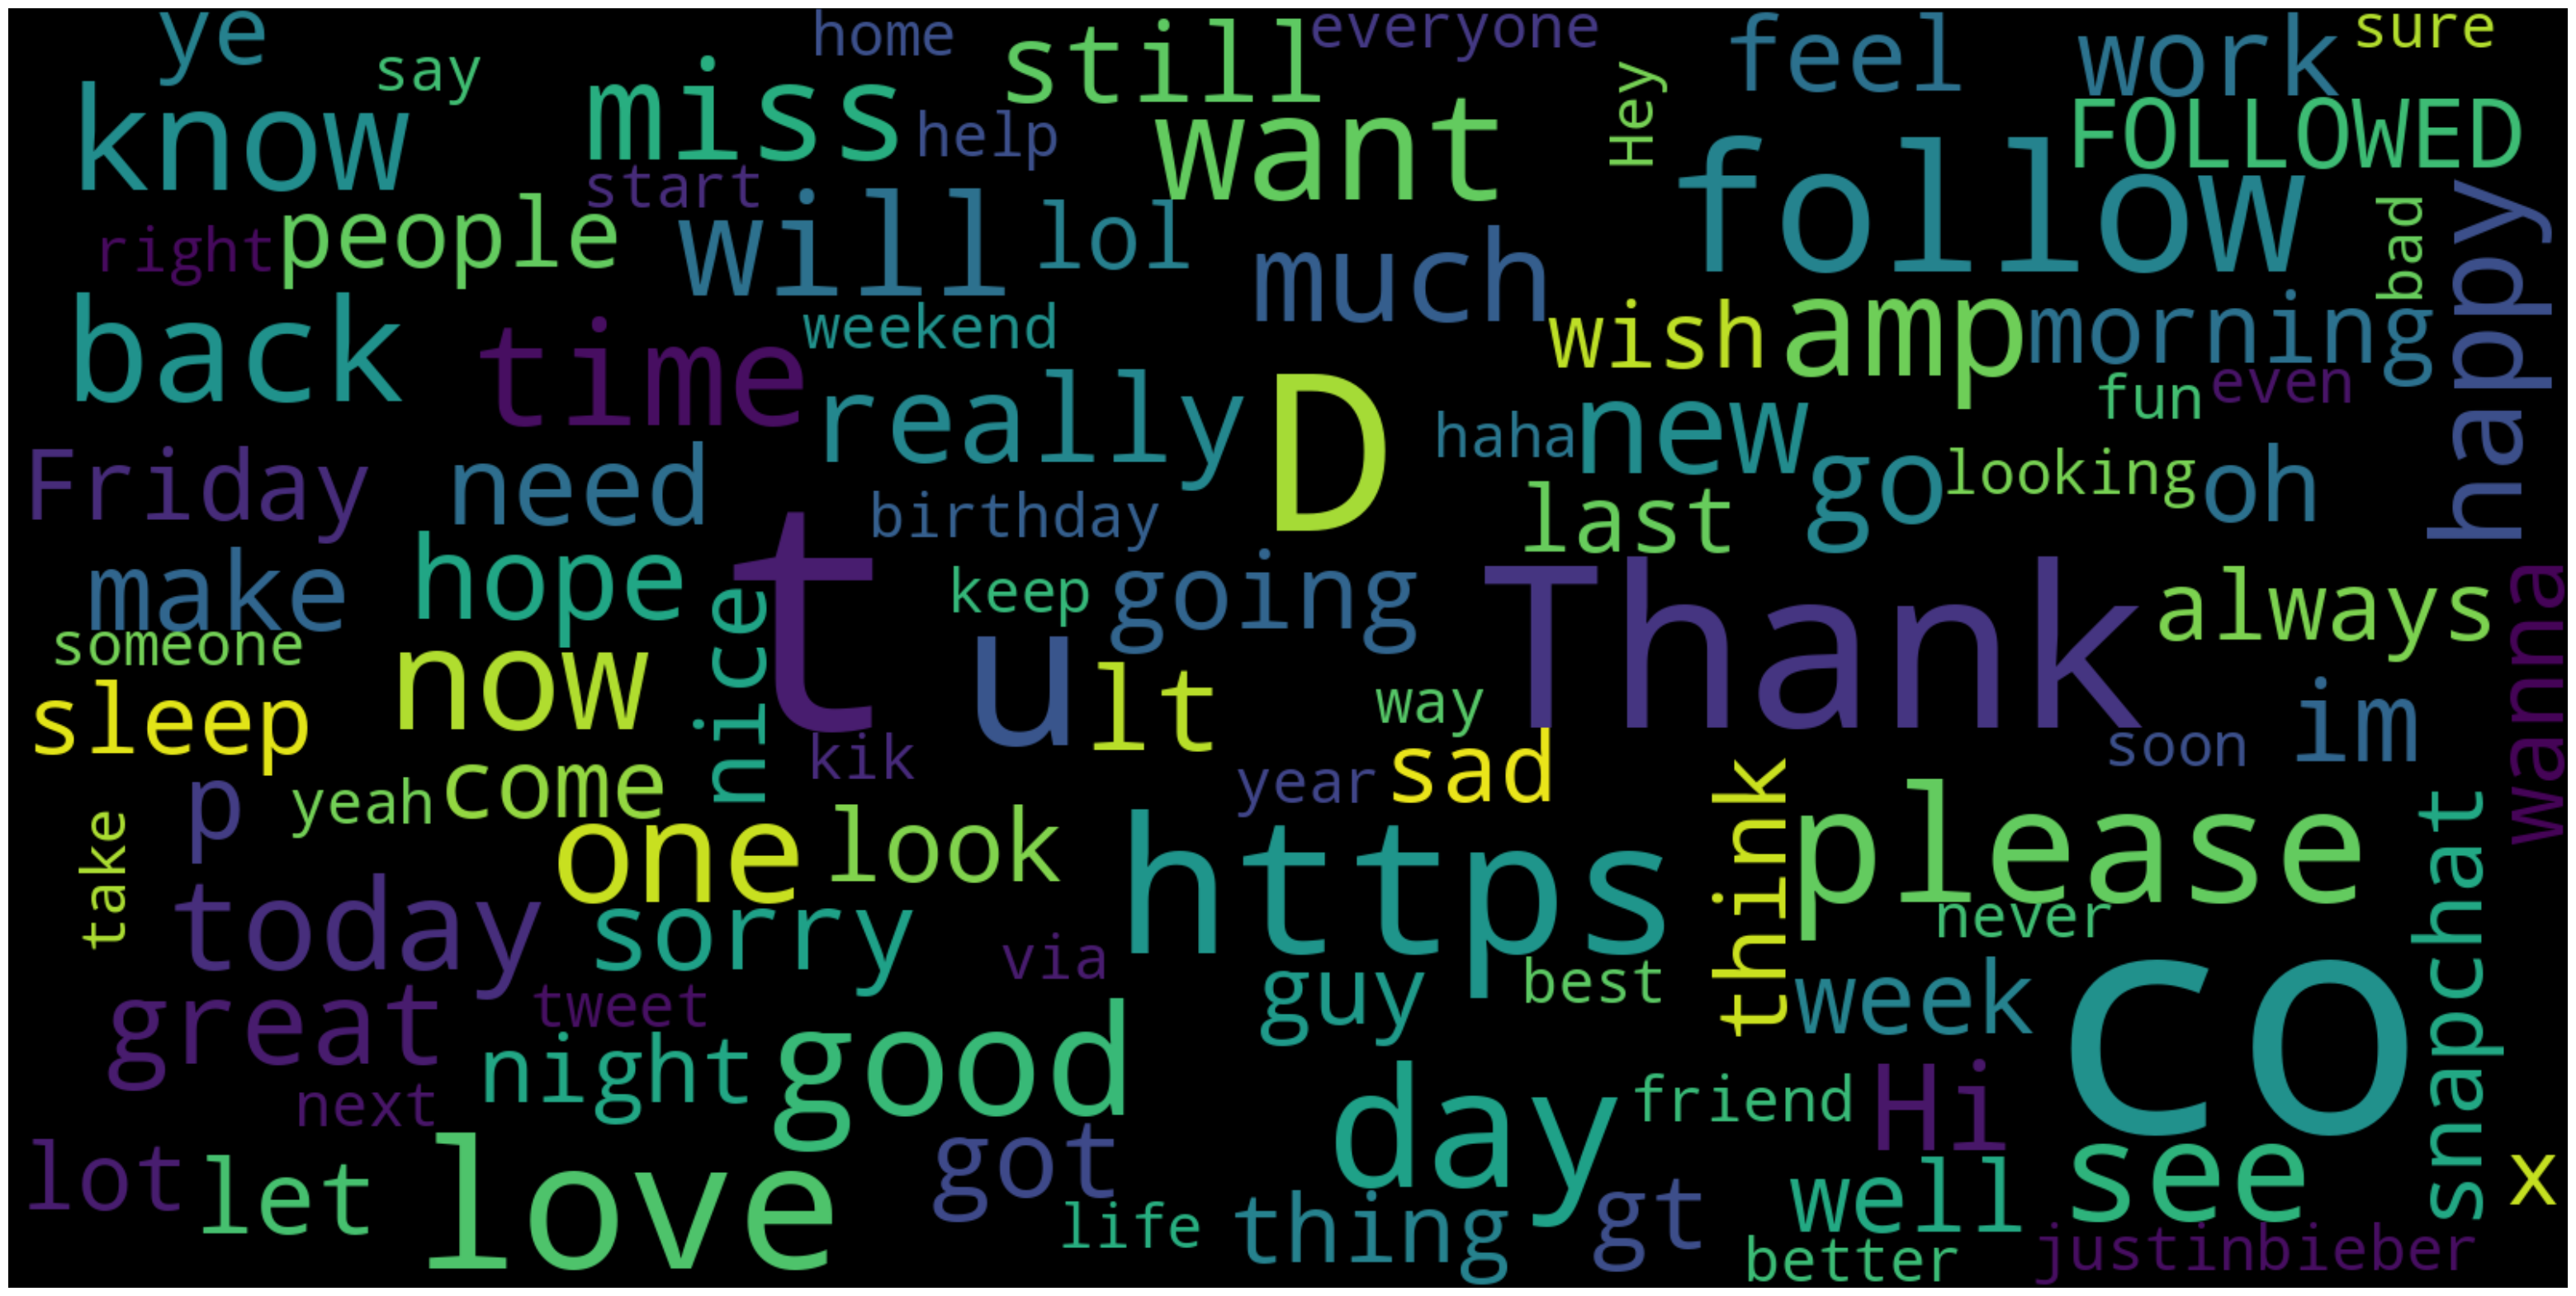

In [ ]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Observing the positive tweets

In [ ]:
positive_tweet = df[df["label"] == 1]

In [ ]:
positive_tweet.head()

text  label
2             Have a blessed friday :)\n#جمعة_مباركة      1
3  💓🚮👯- the definition of perfection would have a...      1
4  @aspenrage @jasmineneupane @jyotsnanepal i app...      1
6                                       Done! Yey :)      1
7  @DesignThinkMake We're so glad you discovered ...      1

In [ ]:
positive_tweet.head()

text  label
2             Have a blessed friday :)\n#جمعة_مباركة      1
3  💓🚮👯- the definition of perfection would have a...      1
4  @aspenrage @jasmineneupane @jyotsnanepal i app...      1
6                                       Done! Yey :)      1
7  @DesignThinkMake We're so glad you discovered ...      1

In [ ]:
text_positive = positive_tweet.text

In [ ]:
string = pd.Series(text_positive).str.cat(sep=' ')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

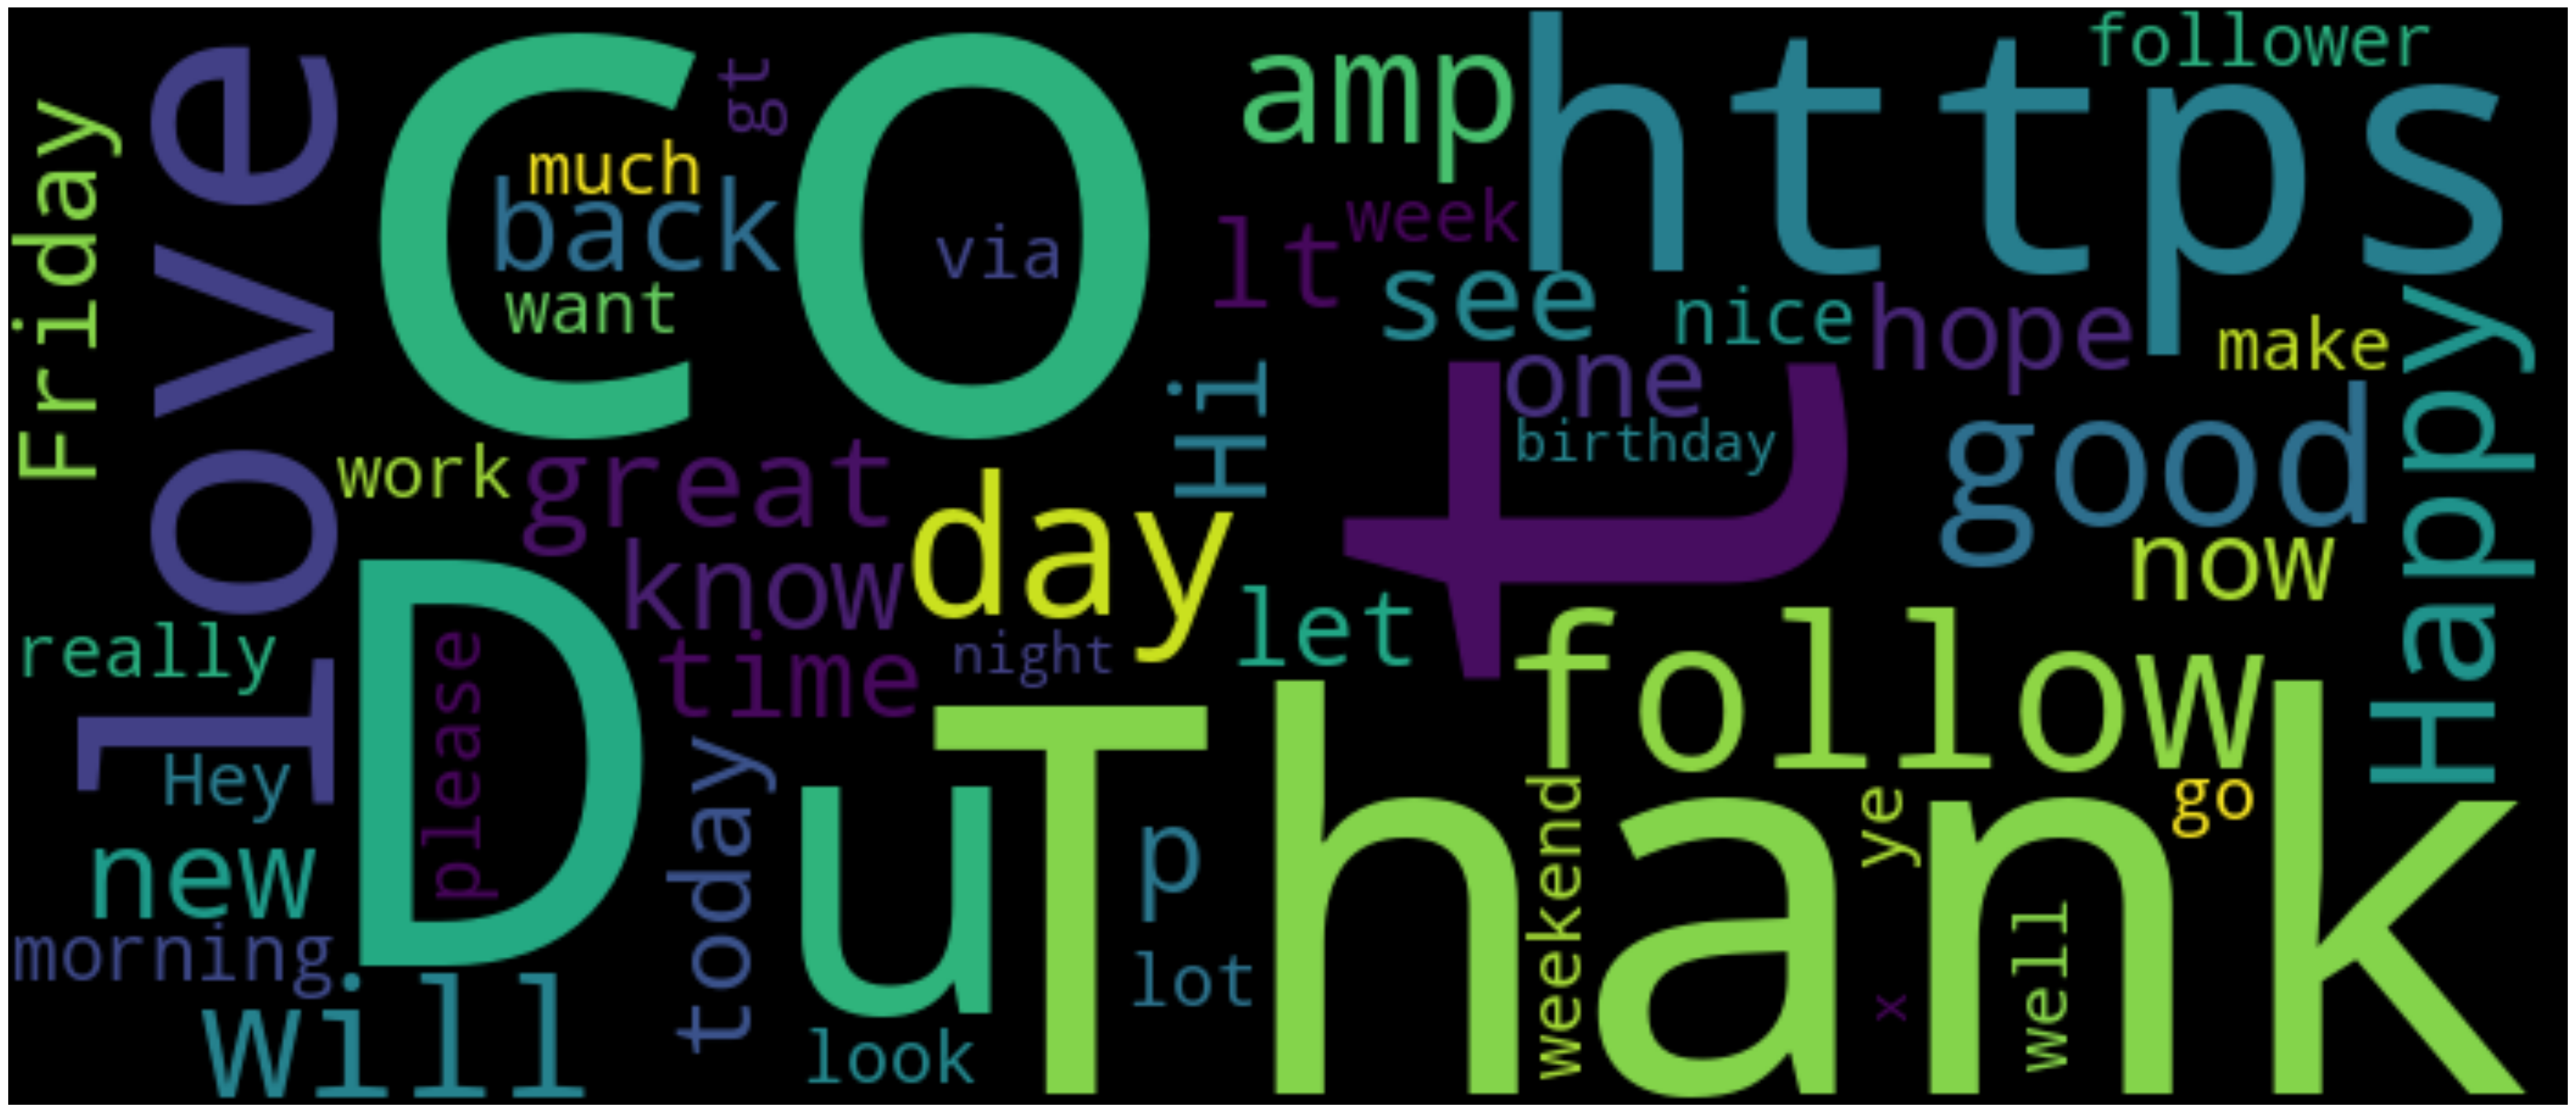

In [ ]:
wordcloud = WordCloud(width=700, height=300,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Preprocessing: Lower Casing



In [ ]:
positive_tweet['text_lowered'] = positive_tweet.text.str.lower()
positive_tweet[['text', 'text_lowered']].head()

<ipython-input-270-24188474e598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweet['text_lowered'] = positive_tweet.text.str.lower()


text  \
2             Have a blessed friday :)\n#جمعة_مباركة   
3  💓🚮👯- the definition of perfection would have a...   
4  @aspenrage @jasmineneupane @jyotsnanepal i app...   
6                                       Done! Yey :)   
7  @DesignThinkMake We're so glad you discovered ...   

                                        text_lowered  
2             have a blessed friday :)\n#جمعة_مباركة  
3  💓🚮👯- the definition of perfection would have a...  
4  @aspenrage @jasmineneupane @jyotsnanepal i app...  
6                                       done! yey :)  
7  @designthinkmake we're so glad you discovered ...

In [ ]:
text_positive_lowered = positive_tweet.text_lowered

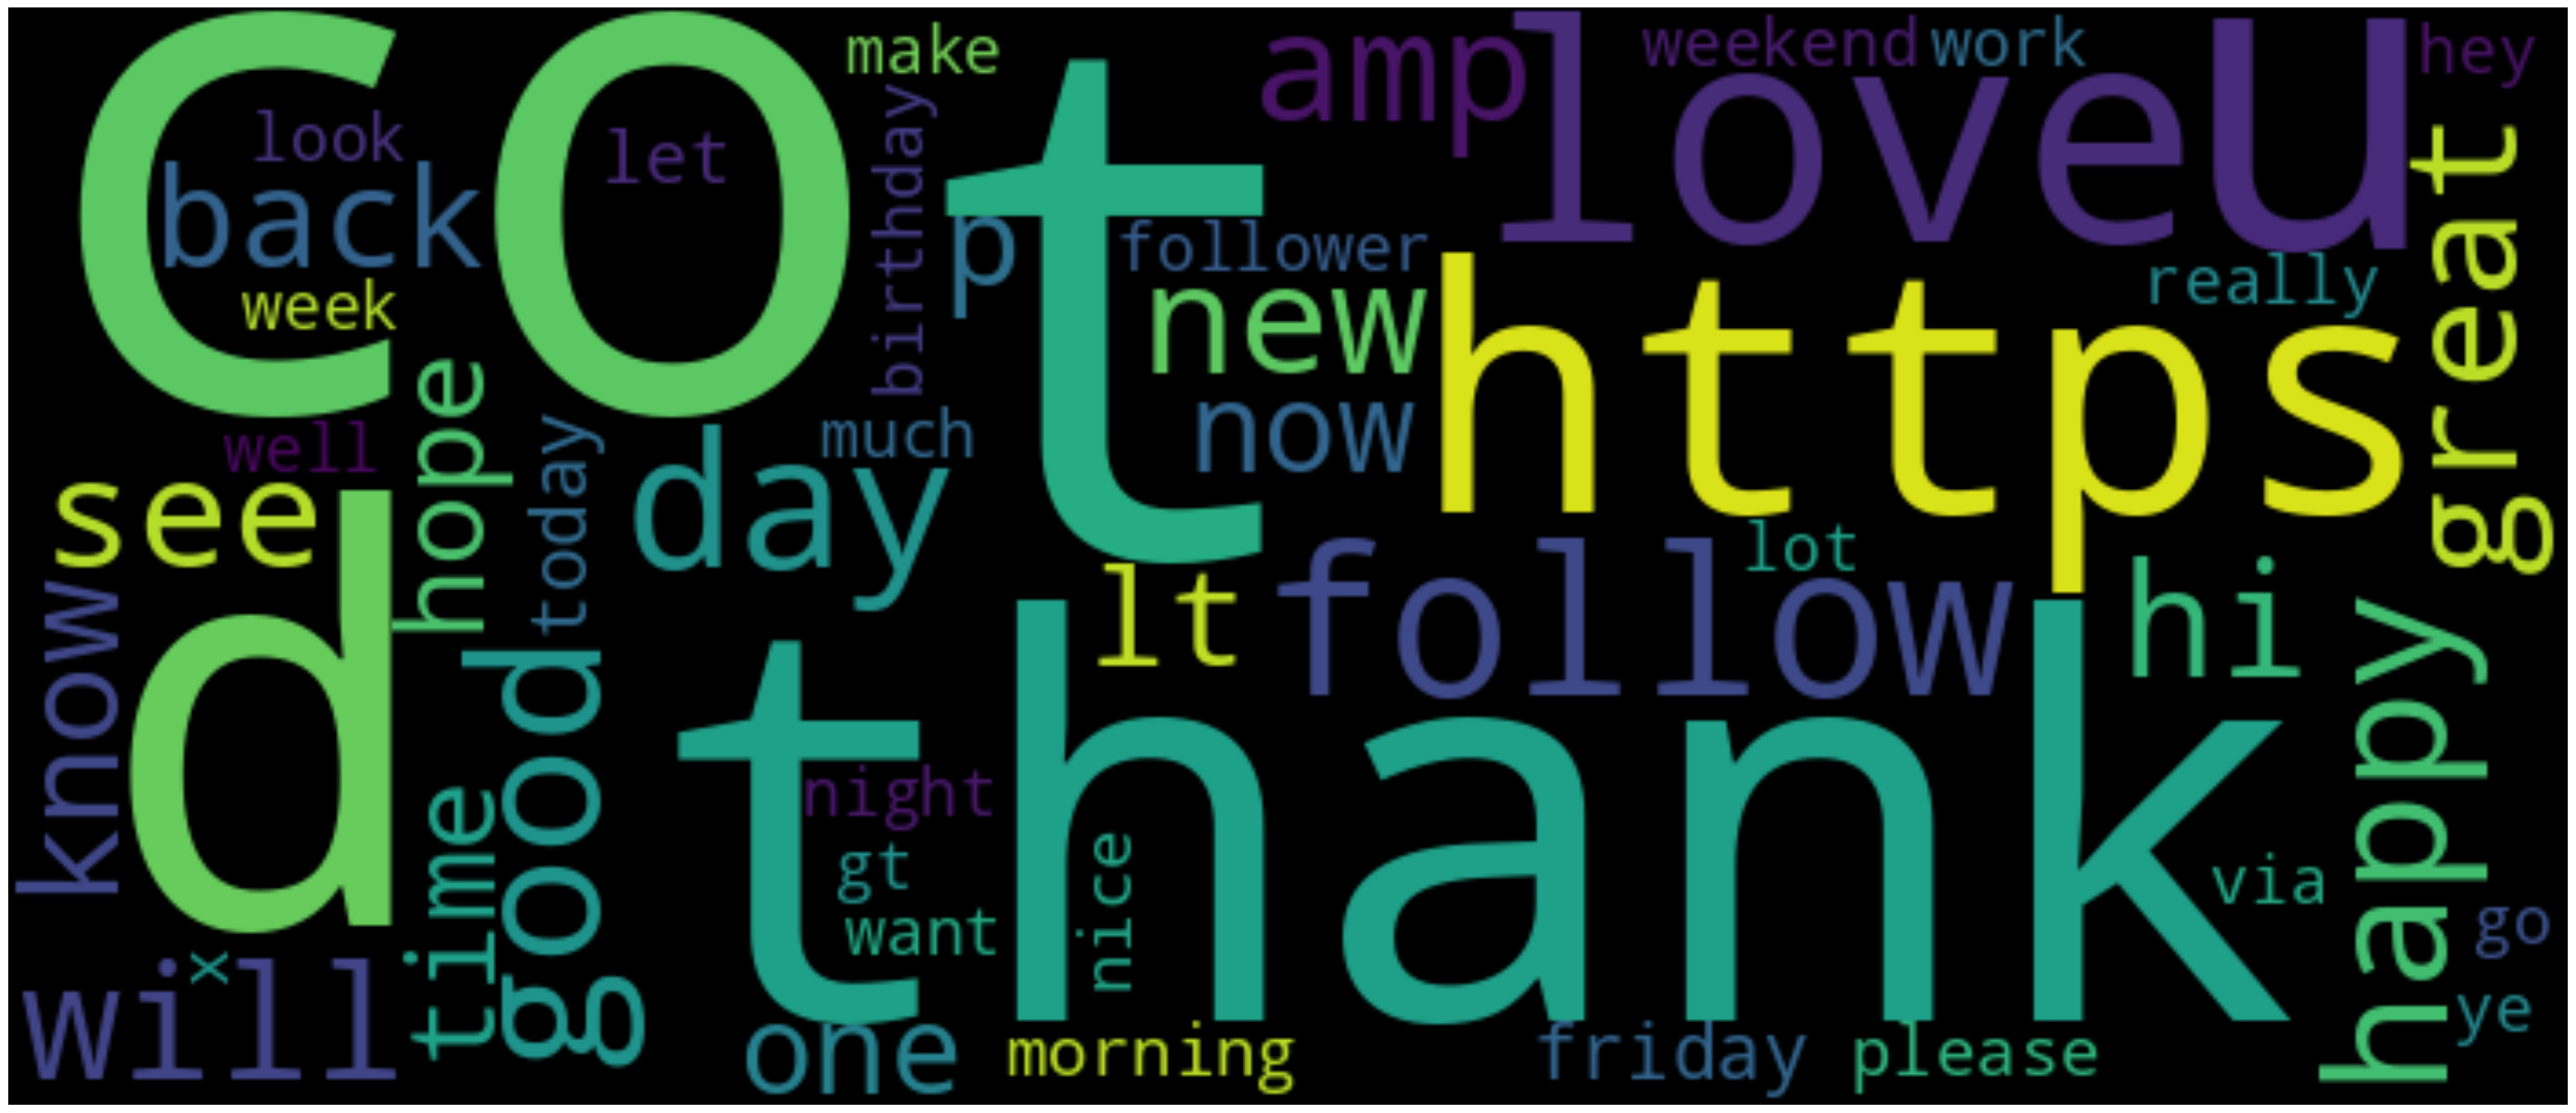

In [ ]:
string = pd.Series(text_positive_lowered).str.cat(sep=' ')
wordcloud = WordCloud(width=700,height=300,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Preprocessing 2: Stop Word Removal

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
positive_tweet['remove_stopwords'] = positive_tweet['text_lowered'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
positive_tweet[['text', 'text_lowered','remove_stopwords']].head()

<ipython-input-274-b92b7d9d6253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweet['remove_stopwords'] = positive_tweet['text_lowered'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


text  \
2             Have a blessed friday :)\n#جمعة_مباركة   
3  💓🚮👯- the definition of perfection would have a...   
4  @aspenrage @jasmineneupane @jyotsnanepal i app...   
6                                       Done! Yey :)   
7  @DesignThinkMake We're so glad you discovered ...   

                                        text_lowered  \
2             have a blessed friday :)\n#جمعة_مباركة   
3  💓🚮👯- the definition of perfection would have a...   
4  @aspenrage @jasmineneupane @jyotsnanepal i app...   
6                                       done! yey :)   
7  @designthinkmake we're so glad you discovered ...   

                                    remove_stopwords  
2                     blessed friday :) #جمعة_مباركة  
3   💓🚮👯- definition perfection would picture next :)  
4  @aspenrage @jasmineneupane @jyotsnanepal appre...  
6                                       done! yey :)  
7  @designthinkmake we're glad discovered us! :) ...

## Task 1: Observe the wordcloud output for the removed_stopwords data. Add additional stopwords data to remove noise from your data.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["https"]) #adding our own stopwords

In [ ]:
print(stopwords)

{'below', 'only', 'such', 'cannot', 'than', 'the', 'against', 'therefore', 'www', 'some', 'yourselves', 'between', 'how', 'then', "won't", 'shall', "he's", "he'll", 'did', "here's", 'http', 'of', 'while', 'so', 'hers', 'yours', 'k', "that's", "isn't", "who's", 'where', 'get', "mustn't", 'has', "hasn't", 'other', 'doing', 'him', "they'll", 'my', 'but', 'have', "it's", 'had', 'r', 'down', 'same', 'those', 'myself', 'themselves', "wasn't", 'through', 'at', "they're", "can't", 'on', 'ourselves', 'were', "you'll", "aren't", 'about', 'himself', 'our', 'com', 'an', 'as', "they'd", 'should', "we're", 'for', 'herself', 'these', 'otherwise', "what's", 'its', 'no', "don't", 'am', 'to', 'off', 'just', 'and', 'most', "i'll", 'there', 'is', 'would', 'it', 'your', 'when', "i've", "couldn't", 'before', 'nor', 'under', 'be', "there's", 'by', 'further', 'can', 'itself', 'once', "didn't", "why's", "i'm", 'being', 'was', 'their', 'yourself', 'until', 'them', 'more', 'over', "she's", 'during', 'i', 'do', '

In [ ]:
remove_stopwords = positive_tweet.remove_stopwords

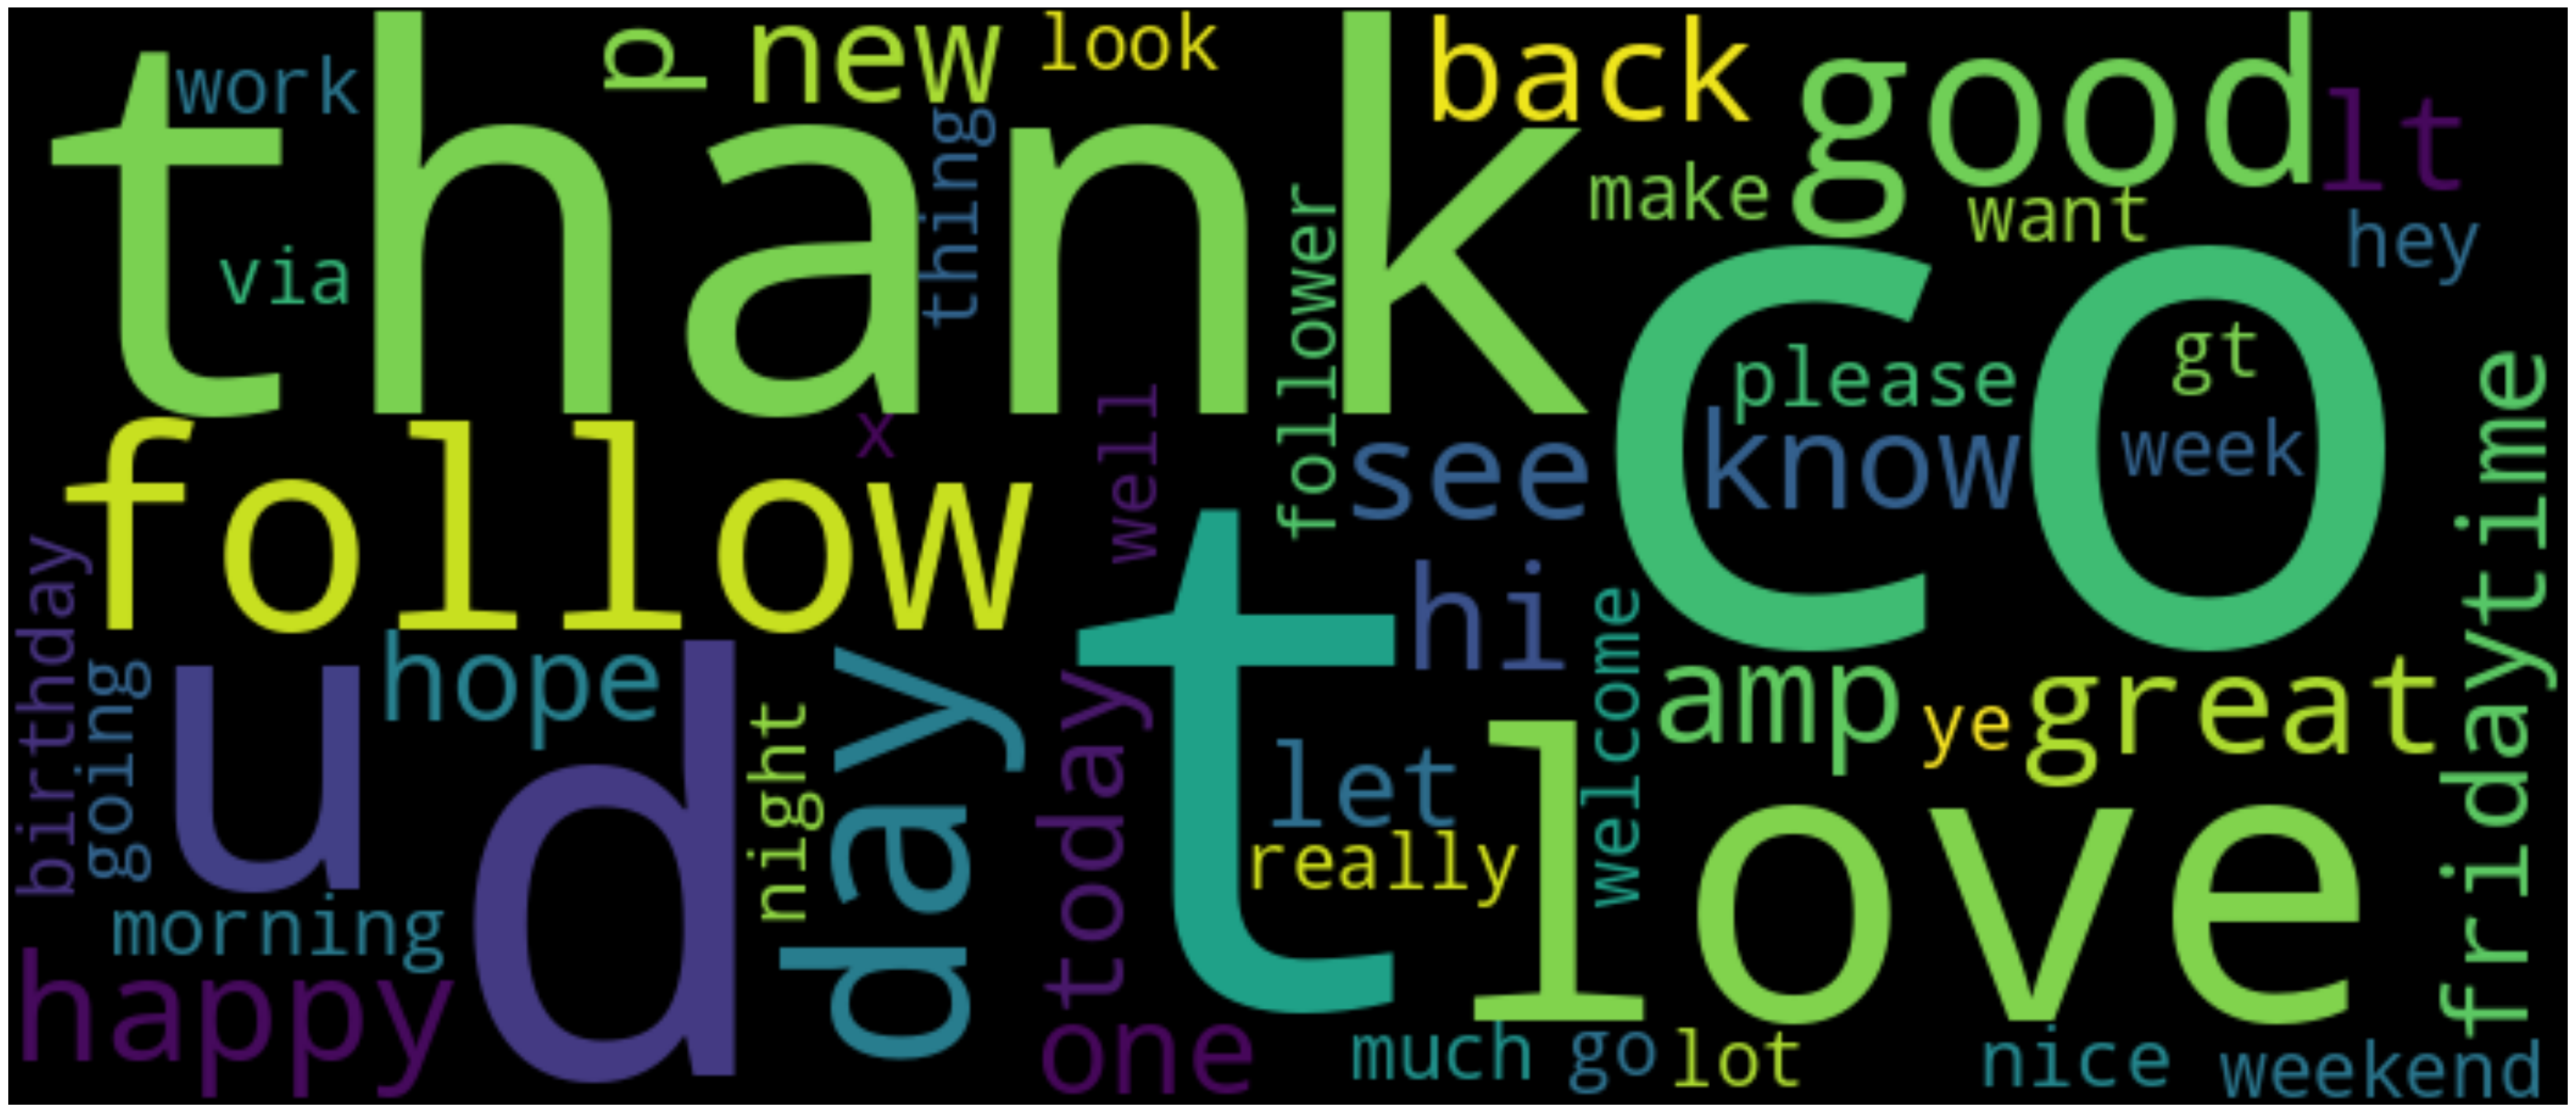

In [ ]:
string = pd.Series(remove_stopwords).str.cat(sep=' ')
wordcloud = WordCloud(width=700,stopwords=stopwords, height=300,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Task 2: After analyzing the generated word cloud, discuss whether it reflects a positive sentiment. Justify your answer with examples from the word cloud analysis.



Provide your answer here:

## Task 3: Now repeat the same process with the negative tweets.

In [ ]:
negative_tweet = df[df["label"] == 0]

In [ ]:
negative_tweet.head()

text  label
0                                 Want pluckerssss :(      0
1            @jungsilhoon ......... not really :(((((      0
5   GUYS add me on SNAPCHAT - AmargoLonnard #snapc...      0
9                          can't go back to sleep :((      0
12  I met a new kinds of people, new classmate, ne...      0

In [ ]:
text_negative = negative_tweet.text


In [ ]:
string = pd.Series(text_negative).str.cat(sep=' ')

## Task 3: After analyzing the generated word cloud, discuss whether it reflects a negative sentiment. Justify your answer with examples from the word cloud analysis.
